# Project 1: NBA Social Power
## Joshua Huang and Dylan Hyun

### Data Reading and Cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
social = pd.read_csv('social-power-nba/nba_2016_2017_100.csv', sep=',',
                    encoding='latin-1')
social.head()

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,...,FGA_PG_RANK,FG_PCT_RANK,CFID,CFPARAMS,WIKIPEDIA_HANDLE,TWITTER_HANDLE,SALARY_MILLIONS,PTS,ACTIVE_TWITTER_LAST_YEAR,TWITTER_FOLLOWER_COUNT_MILLIONS
0,201566,Russell Westbrook,1610612760,OKC,28,81,46,35,0.568,34.6,...,1,293,5,"2,015,661,610,612,760",Russell_Westbrook,russwest44,26.54,31.6,1,4.500
1,1626246,Boban Marjanovic,1610612765,DET,28,35,16,19,0.457,8.4,...,356,47,5,"16,262,461,610,612,700",Boban_Marjanovi_,0,7.00,5.5,0,0.000
2,1627743,Demetrius Jackson,1610612738,BOS,22,5,1,4,0.200,3.4,...,480,3,5,"16,277,431,610,612,700",Demetrius_Jackson,d_jay11,1.45,2.0,1,0.049
3,203076,Anthony Davis,1610612740,NOP,24,75,31,44,0.413,36.1,...,3,95,5,"2,030,761,610,612,740",Anthony_Davis_(basketball),antdavis23,22.12,28.0,1,1.220
4,201935,James Harden,1610612745,HOU,27,81,54,27,0.667,36.4,...,9,253,5,"2,019,351,610,612,740",James_Harden,jharden13,26.50,29.1,1,4.470


In [3]:
adv_stats = pd.read_csv('social-power-nba/nba_2017_players_stats_combined.csv', sep=',',
                    encoding='latin-1')

adv_stats.columns
adv_stats = adv_stats.drop(columns=['Unnamed: 0'])
adv_stats.head()

,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,3PA,...,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W
0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,7.2,...,OKC,81,34.6,6.74,-0.47,6.27,17.34,23.0,102.31,46
1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,9.3,...,HOU,81,36.4,6.38,-1.57,4.81,15.54,19.0,102.98,54
2,3,Isaiah Thomas,PG,27,33.8,9.0,19.4,0.463,3.2,8.5,...,BOS,76,33.8,5.72,-3.89,1.83,8.19,16.1,99.84,51
3,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,1.8,...,NO,75,36.1,0.45,3.90,4.35,12.81,19.2,100.19,31
4,5,DeMar DeRozan,SG,27,35.4,9.7,20.9,0.467,0.4,1.7,...,TOR,74,35.4,2.21,-2.04,0.17,5.46,15.5,97.69,47


In [4]:
stats_social = social.merge(adv_stats, left_on='PLAYER_NAME', right_on = "PLAYER")
stats_social.columns

Index(['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'AGE_x',
       'GP_x', 'W_x', 'L', 'W_PCT', 'MIN', 'OFF_RATING', 'DEF_RATING',
       'NET_RATING', 'AST_PCT', 'AST_TO', 'AST_RATIO', 'OREB_PCT', 'DREB_PCT',
       'REB_PCT', 'TM_TOV_PCT', 'EFG_PCT', 'TS_PCT', 'USG_PCT', 'PACE_x',
       'PIE_x', 'FGM', 'FGA_x', 'FGM_PG', 'FGA_PG', 'FG_PCT', 'GP_RANK',
       'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'OFF_RATING_RANK',
       'DEF_RATING_RANK', 'NET_RATING_RANK', 'AST_PCT_RANK', 'AST_TO_RANK',
       'AST_RATIO_RANK', 'OREB_PCT_RANK', 'DREB_PCT_RANK', 'REB_PCT_RANK',
       'TM_TOV_PCT_RANK', 'EFG_PCT_RANK', 'TS_PCT_RANK', 'USG_PCT_RANK',
       'PACE_RANK', 'PIE_RANK', 'FGM_RANK', 'FGA_RANK', 'FGM_PG_RANK',
       'FGA_PG_RANK', 'FG_PCT_RANK', 'CFID', 'CFPARAMS', 'WIKIPEDIA_HANDLE',
       'TWITTER_HANDLE', 'SALARY_MILLIONS', 'PTS', 'ACTIVE_TWITTER_LAST_YEAR',
       'TWITTER_FOLLOWER_COUNT_MILLIONS', 'Rk', 'PLAYER', 'POSITION', 'AGE_y',
       'MP', 'FG', 'FGA_y

## Question 1: Do better players have more Twitter followers?

In this question we looked to investigate if the best NBA players always had the most Twitter followers. We made the assumption that generally as a player's skill increases his popularity, in terms of Twitter followers will increases as well. We then performed some analysis on populations where this was not the case. 

The statistic we will use to measure a player's skill is called Wins Above Replacement. This statistic represents the number of wins a player adds to their team over a set standard of a player that could easily replace him. This is a common stats used across sports to determine the value of a player. Below are the five players with the highest Wins_RPM in our dataset 

In [5]:
stats_social.sort_values(by=['WINS_RPM'],ascending = False)[['PLAYER_NAME','WINS_RPM']].head()

,PLAYER_NAME,WINS_RPM
6,LeBron James,20.43
28,Stephen Curry,18.80
14,Jimmy Butler,17.35
0,Russell Westbrook,17.34
82,Draymond Green,16.84


We started out by making a scatterplot of Wins_RPM against Twitter Followers in Tableau, and we found that this plot was best fit by a polynomial trend line. 

<img src="files/twitter_wins.png">

As you can see in the graph, there are two populations that seem to not fit the trendline. One population consists of players who are more popular than predicted given their skill, and the other consists of players who are less popular than predicted given their skill. We decided to investigate these two populations, and see why they weren't fitting the trendline. 

In [6]:
over_popular = stats_social.copy()[stats_social['TWITTER_FOLLOWER_COUNT_MILLIONS'] > 2]
over_popular = over_popular[over_popular['WINS_RPM'] < 6]
over_popular.sort_values(by=['TWITTER_FOLLOWER_COUNT_MILLIONS'], ascending = False)[['PLAYER_NAME','TWITTER_FOLLOWER_COUNT_MILLIONS','WINS_RPM']]

,PLAYER_NAME,TWITTER_FOLLOWER_COUNT_MILLIONS,WINS_RPM
78,Carmelo Anthony,8.94,5.26
73,Dwyane Wade,7.01,2.52
27,Dwight Howard,6.97,5.65
33,Pau Gasol,6.38,5.48
64,Dirk Nowitzki,2.89,3.02
48,Jeremy Lin,2.40,2.21


In [7]:
under_popular = stats_social.copy()[stats_social['TWITTER_FOLLOWER_COUNT_MILLIONS'] < 2]
under_popular = under_popular[under_popular['WINS_RPM'] > 12]
under_popular.sort_values(by=['TWITTER_FOLLOWER_COUNT_MILLIONS'], ascending = False)[['PLAYER_NAME','TWITTER_FOLLOWER_COUNT_MILLIONS','WINS_RPM']]

,PLAYER_NAME,TWITTER_FOLLOWER_COUNT_MILLIONS,WINS_RPM
3,Anthony Davis,1.220,12.81
30,DeAndre Jordan,0.984,12.59
82,Draymond Green,0.911,16.84
32,Kyle Lowry,0.589,12.67
14,Jimmy Butler,0.469,17.35
9,Giannis Antetokounmpo,0.246,13.00
16,Rudy Gobert,0.195,15.55
10,Kawhi Leonard,0.166,15.53
13,Nikola Jokic,0.009,13.18


We decided the best way to analyze these populations was to compare them to each other, and see what the differences between them were. The biggest difference we found was the difference in age. 

In [8]:
print(over_popular['AGE_x'].mean())
print(under_popular['AGE_x'].mean())

33.666666666666664
25.77777777777778


Using this information, and our background knowlege of the players in each group, we made the hypothesis that:
- The overpopular players are past superstars who's skill has declined, but have maintained their popularity
- The underpopular playesr are good young players who haven't been in the league long enough to build their popularity

There are only two players who didn't fit this mold. 
In the over popular group Jeremy Lin is only 28 years old. However, the reason he is so popular is because he has such a large international following. He casued the month long sensation known as 'Linsanity' back in 2016, where he had a strech of games where he burst onto the scene. Since then his skill has tapered off, but he has maintained his popularity with Asian-Americans, and across seas in Asia. 
The other player, who was in the underpopular group, is Kyle Lowery who is 31 years old. He is an outlier in this group, because he only started to play at such a high level in the latter part of his career. These two players were thus removed from our future analysis of the two populations.

We believe that the players in these two groups are linked, in that the underpopular players are on a similar career trajectory to the overpopular players. 
We hypothsize that over time the underpopular players will continue to play at a high level, and thus continue to gain popularity. But, once they are older, their skill will decline, but they will maintain their popularity. 

To test this hypothesis we can look back at the careers of the overpopular players. If our hypothesis holds then they should have similar wins above replacement when they were 25 compared to when the current under popular players were 25. 

We went and manually gathered this information from basketball-reference.com. Since, wins above replacement data has only been kept for the past few seasons we used a similar statistic called win shares (WS). If a player had yet to turn 25 we just used the WS from their most recent full season. In the data below the group 'veteran' referes to the overpoular players, and 'young' refers to the underpopular players. 

In [9]:
ws_25 = pd.read_csv('social-power-nba/ws_25.csv', sep=',',
                    encoding='latin-1')
ws_25

,Player_Name,Group,WS_25
0,Dwight Howard,veteran,14.4
1,Pau Gasol,veteran,12.0
2,Dirk Nowitzki,veteran,11.5
3,Dwayne Wade,veteran,8.8
4,Carmelo Anthony,veteran,7.9
5,Anthony Davis,young,11.0
6,Kawahi Leonard,young,13.6
7,Nikola Jokic,young,9.7
8,Jimmy Buttler,young,11.2
9,Rudy Gobert,young,14.3


In [10]:
print(ws_25[ws_25['Group']=="veteran"].mean())
print(ws_25[ws_25['Group']=="young"].mean())

WS_25    10.92
dtype: float64
WS_25    11.714286
dtype: float64


The mean WS at age 25 for both groups was almost identical.

This supports our hypothesis and our general takeaway from this is that young stars today who are less popular given their skill will gain followers over time, and their skill will decrease.

The other hypothesis we wanted to test was if offensive players were more popular than defensive players. To do this we used the stats called offensive and defensive rating. These stats measure either the offensive or defensive skill of a player. We plotted offensive and defensive rating against Twitter followers to examine the differences between them.

<img src="files/twitter_rating.png">

As the graph shows, generally the best offensive players have more twitter followers than the best defensive players. We further quantified this by looking at the mean followers of the best offensive and defensive players.

In [11]:
stats_social.sort_values(by='OFF_RATING', ascending=False)[['PLAYER_NAME','OFF_RATING','TWITTER_FOLLOWER_COUNT_MILLIONS']].head(10)

,PLAYER_NAME,OFF_RATING,TWITTER_FOLLOWER_COUNT_MILLIONS
2,Demetrius Jackson,124.2,0.049
62,JaVale McGee,121.4,0.193
28,Stephen Curry,118.1,9.560
5,Kevin Durant,117.2,16.200
7,Chris Paul,116.2,6.400
25,Blake Griffin,115.2,4.190
82,Draymond Green,115.2,0.911
6,LeBron James,114.9,37.000
13,Nikola Jokic,114.9,0.009
42,Kyrie Irving,114.2,3.480


In [12]:
stats_social.sort_values(by='OFF_RATING', ascending=False)['TWITTER_FOLLOWER_COUNT_MILLIONS'].head(10).mean()

7.799200000000001

In [13]:
stats_social.sort_values(by='DEF_RATING', ascending=False)[['PLAYER_NAME','DEF_RATING','TWITTER_FOLLOWER_COUNT_MILLIONS']].head(10)

,PLAYER_NAME,DEF_RATING,TWITTER_FOLLOWER_COUNT_MILLIONS
2,Demetrius Jackson,117.8,0.049
70,Brandon Bass,116.7,0.025
93,Julius Randle,113.3,0.358
67,Kenneth Faried,112.1,0.400
91,Thomas Robinson,111.2,0.126
78,Carmelo Anthony,111.1,8.940
94,Cheick Diallo,110.9,0.015
12,Karl-Anthony Towns,110.8,0.281
35,Eric Bledsoe,110.2,0.199
85,Richaun Holmes,110.0,0.010


In [14]:
stats_social.sort_values(by='DEF_RATING', ascending=False)['TWITTER_FOLLOWER_COUNT_MILLIONS'].head(10).mean()

1.0402999999999998

As seen in the means for each of the top 10 offensive and defensive players, the offensive players had over 7 times as many twitter followers as the defensive players. 

## Question 2: How is salary related to a player's skill?

There are many factors that can influence the salary of an athlete, some that are even unmeasurable such as an agent’s influence in negotiations. However, we wanted to investigate the relationship between a player's skill. What we would predict is that there would be groups of overpaid, properly paid, and underpaid players given the value they add. The graph below is what we would predict to see on such a graph 

<img src="files/bball_salary.png">

We started out by plotting a player's salary against his wins above replacement, and fitting a linear regression line to the data. 
<img src="salary_wins_all.png">

As prediced, as wins above replacement increases, salary increases. We observed that there is a lot of variability in this graph. To learn more about the players who were far away from the trendline we analyzed what the differences were between the players in the overpaid portion of the graph and those in the underpaid portion. 

We hypothesized that the main factor in these differences is a payer's age. We predicted that young players would generally be underpaid, and older players would be overpaid, and players in between would be propperly paid. The value trendline for older players would be higer, and the younger players' trendline lower, than the current trendline.

We divided the data into players below 25 years old, between 25 and 30 years old, and over 30 years old, and fit a new trendline to each subset. 
<img src="salary_wins.png">

As the graph shows the young players trendline is significantly below the overall trendline. The prime players' trendline is about equal to that of the overall trendline, and the older players' trendline is above the overall trendline. This supports our initial hypothesis.

The key takaway from our analysis is that generally, older players are overpaid, and younger players are underpaid. It's understandable why young players are underpaid, due to the fact that they are on a set contract when they get drafted, which can't be negotiated, and veterans get to negotiate their contracts with the team of their choice. However, our analysis does suggest that teams maybe should invest in younger players over older ones to gain more value. 

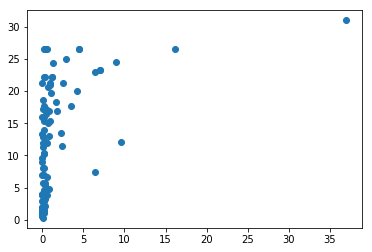

In [15]:
plt.scatter(stats_social['TWITTER_FOLLOWER_COUNT_MILLIONS'],stats_social['SALARY_MILLIONS'])

## Question 3: Which teams have the best attendance given the size of their market?

In [16]:
attendance = pd.read_excel("nba_2017_attendance.xlsx")
attendance.head(8)

,TEAM,GMS,TOTAL,AVG,PCT,TV Homes,% of US,Lat,Long,VALUE_MILLIONS,ELO,Salary
0,Atlanta Hawks,41,654306,15958,85.2,2412730,2.104,33.7572,-84.3963,885,1479,100079557
1,Boston Celtics,41,760690,18553,99.6,2424240,2.114,42.3663,-71.0623,2200,1587,115009962
2,Brooklyn Nets,41,632608,15429,85.2,7348620,6.407,40.6827,-73.9747,1800,1372,96039772
3,Charlotte Hornets,41,710643,17332,90.9,1189950,1.038,35.2245,-80.8410,780,1463,117228164
4,Chicago Bulls,41,888882,21680,103.6,3463060,3.019,41.8806,-87.6741,2500,1519,89341913
5,Cleveland Cavaliers,41,843042,20562,100.0,1498960,1.307,41.4967,-81.6881,1200,1545,137288549
6,Dallas Mavericks,41,811366,19789,103.1,2713380,2.366,32.7904,-96.8103,1450,1420,85775281
7,Denver Nuggets,41,605585,14770,77.1,1630380,1.422,39.7486,-105.0080,890,1552,107889099


In order to determine factors that affected attendance and how that correlated with market size available for NBA teams, we utilize a data set with total fan attendance for the past year. We then aggregated data on number of TV Homes in each region to determine market size and plotted it against attendance to determine relationships between the two. We also looked at valuations of the team, elo ratings, and salary paid out of players to see if these factors were driven by fan attendance and to see if these are statistics NBA teams should consider.

![title](Attendance_map.png)

We first mapped each NBA team to a map of the United States with fan attendance represented by the coloro gradient and size of the circle represented by the size of the circle. From this, we noticed that geographic location seemed to affect fan attendace. Teams on the east coast and west coast saw much higher attendance numbers than those in the midwest. We also saw that larger market teams also saw better attendance numbers than small market teams.

![title](Elo_and_Attendance.png)

To look at some factors that drove fan attendance, we also looked at ELO rating of the teams, essentialy how well each team did during the season and mapped that against fan attendance. We hypothesized that better teams with higher ELO ratings had better fan attendance which was supported by the graph we created. Teams on the right with higher ELO ratings tended to have better attendance than worse teams on the left side who saw worse attendance on average.

![title](Salary_Elo.png)

When we saw that ELO rating seemed to drive attendance numbers, we aggregated salary paid to players over the last year to see how that related to ELO rating. From the bar graph, we saw that teams that paid higher total salaries to players, probably ones that had better players who demanded higher salaries or overall a larger quantity of higher quality players seemed to have better ELO ratings and did better throughout the season.

![title](Valuation_and_Attendance.png)

We finally wanted to tie these relationships back to NBA teams as a whole, and we looked how attendance numbers affected the valuation each NBA team had. On the left side we saw teams represented by larger rectangles valued higher, and on the right side we saw lesser valued teams as smaller rectangles. We noticed that the color gradient seemed to show that higher valued teams also had better attendance and realized that ticket sales represented a large portion of revenue that each team took in each season. Based on this data, we saw that market size and ELO rating of teams positively correlated with fan attendance, which was a determining factor in the overall valuation of NBA teams. Based on these findings NBA teams should also take into account a player's fan base and social media presence in addition to their basketball statistics when signing players, as a player with a larger number of fans can potentially increase the teams total value. These statistics also help explain why small market professional teams are moving locations, as it allows them to tap into new markets and increase their fan base.

## Question 4: What statistics are differentiate All Star players from average players?

In [17]:
asc = pd.read_excel("All star counts.xlsx")
asc.head(8)

,year,tm,player,age,g,mp,per,ts,3par,ftr,...,d_worp,adjusted_worp,estimated_position,bbref_pos,age_on_feb_1,yrs_experience,height,weight,rounded_position,rounded_age
0,1978,LAL,Adrian Dantley,21.0,56.0,1985.0,19.8,0.599,NaN,0.575,...,0.2,11.2,2.3,3.0,21.93,1.0,77.0,208.0,2.0,22.0
1,1978,IND,Adrian Dantley,21.0,23.0,948.0,23.4,0.587,NaN,0.653,...,0.1,12.8,2.5,3.0,21.93,1.0,77.0,208.0,2.0,22.0
2,1978,MIL,Alex English,24.0,82.0,1552.0,17.4,0.568,NaN,0.226,...,-0.2,2.7,2.8,3.0,24.07,1.0,79.0,190.0,3.0,24.0
3,1978,CHI,Artis Gilmore,28.0,82.0,3067.0,23.5,0.604,NaN,0.531,...,3.2,12.8,5.0,5.0,28.36,6.0,86.0,240.0,5.0,28.0
4,1978,DET,Bob Lanier,29.0,63.0,2311.0,24.8,0.580,NaN,0.333,...,2.2,13.9,4.6,5.0,29.39,7.0,83.0,250.0,5.0,29.0
5,1978,NYK,Bob McAdoo,26.0,79.0,3182.0,22.0,0.567,NaN,0.412,...,2.6,10.6,3.6,5.0,26.36,5.0,81.0,210.0,4.0,26.0
6,1978,BOS,Dave Bing,34.0,80.0,2256.0,13.4,0.508,NaN,0.315,...,-1.6,0.3,1.0,1.0,34.19,11.0,75.0,180.0,1.0,34.0
7,1978,BOS,Dave Cowens,29.0,77.0,3215.0,18.6,0.533,NaN,0.233,...,6.1,12.5,3.9,5.0,29.27,7.0,81.0,230.0,4.0,29.0


Due to the larger number of players each year that believe they are "snubbed" from an all star nomination, we wanted to look at statistics that differentiated All Star players from average NBA players. We utilized a dataset with historical player data dating back to 1978. We took one subset of players in the years they were nominated for the All Star game, and compared averages from that subset to averages of normal NBA players that were not nominated for All Star games.

![title](OVORP.png)

![title](DVORP.png)

We began by plotting averages of statistics for All Stars and comparing them to average players. The first statistic we looked at was value over replaceable player or VORP, essentially comparing a player's contribution to that of an average player in the rotation or minimum salary player. We also added a reference band of 1 standard deviation above and below the All Star averages to show where 65% of all All Stars were within that statistic. Suprisingly, All Stars were almost 5 times better in offensive aspect of this statistic than average players, while in the defensive statistic, the two groups were comparable.

![title](OBPM.png)

![title](DBPM.png)

We then also looked at the box score plus minus statistic or BPM, which gave insights into a player's quality of contributions to the team while they were on the court. We saw the same relationship between the offensive and defensive side of the statistic, and concluded that fans preffered offensive players over defensive players when voting for All Stars, and were curious to see how many All Stars in the past 40 years were actually defensive players.

![title](OVORP-DVORP.png)

We took the difference between OVORP and DVORP, to see which All Stars were considered defensive players. We plotted this as a bubble graph to see the exact players that fit our criteria, as the bubbles highlighted shades of orange had a higher defensive than offensive stat and would be considered defensively oriented. Surprisingly, only 8 players out of 489 nominated in the past 40 years fit this criteria, which came out to 0.016%. Although we initially predicted that offensive players would be preffered, the sheer lack of strong defensive players in the All Star game was quite a shock.

![title](Contrib.png)

We finally compared at overall contribution between our two sets and plotted them in a side-by-side bar graph. This again seemed to support our hypothesis but illustrated the sheer gap between players at the top of the league and those that rotate our year after year. Based on our data we were able to find specific statistics such as BPM and VORP that illustrated the skill gap between All Stars and average players, and identified the few players that broke the mold and were still able to achieve an All Star nomination without strong offensive skills.